In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.0.0-rc0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables),(test_images, test_labels) = fashion_mnist.load_data()

In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(test_images)

10000

## 数据预处理

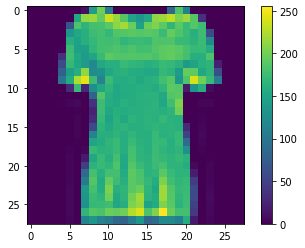

In [10]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

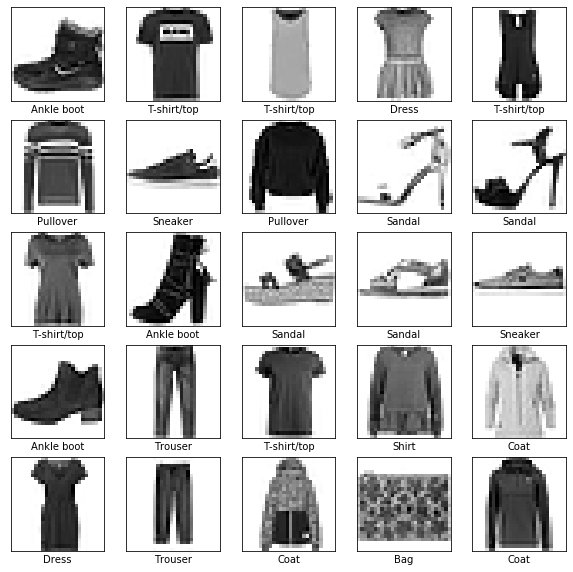

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
model.fit(train_images, train_lables, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4956 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3729 - accuracy: 0.8654
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3366 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2961 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2800 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2684 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2581 - accuracy: 0.9045
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2455 - accuracy: 0.9087
Epoch 10/10
60

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 0.8808


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([2.3480372e-06, 3.3218695e-11, 3.8801904e-09, 2.9937044e-09,
       7.1675477e-10, 1.2895832e-03, 2.2357263e-07, 8.0248369e-03,
       8.0909651e-08, 9.9068284e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

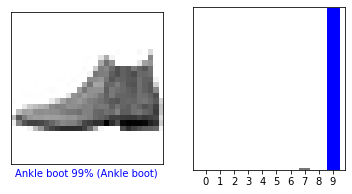

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

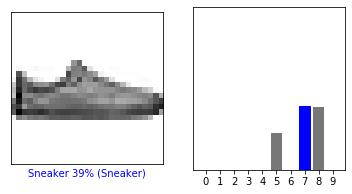

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

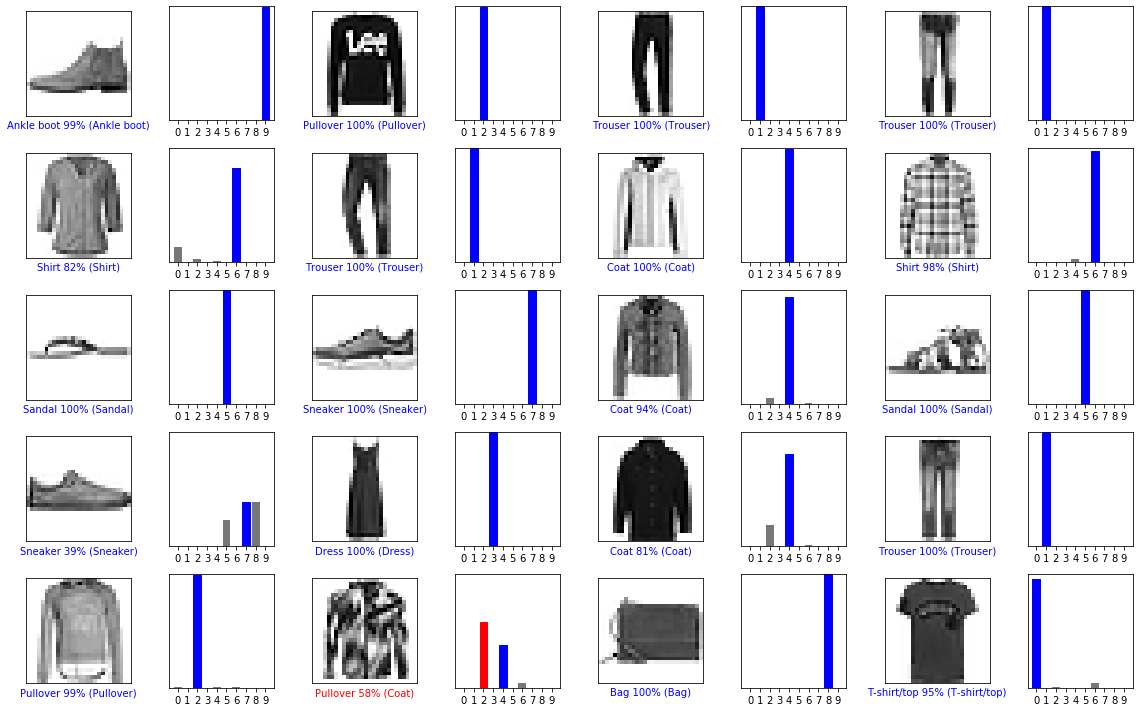

In [25]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()